Linear Fit: Coefficients (from curve_fit)
[2.52611858e+03 1.35916594e-01]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 9.90760019e+04 -1.75006960e+00]
 [-1.75006960e+00  3.17488269e-05]]

Linear Fit: Final Result: y = (2526.11858 +/- 314.76341) e^((0.13592 +/- 0.00563)(x-1994))



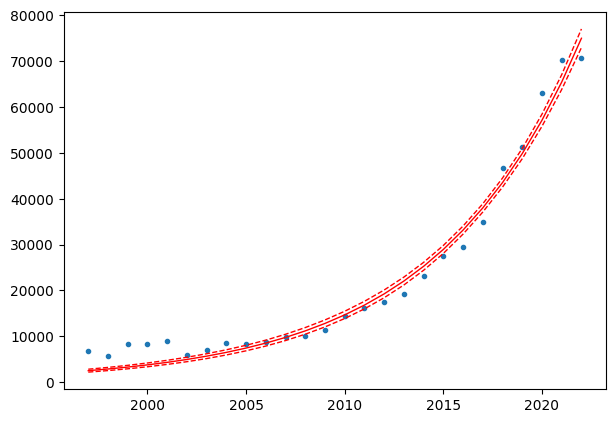

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


# Average Sale Prices for Mercedes-Benz E350 (1997-2022) from CarGurus.com
start_year = 1997

year = np.array([start_year+i for i in range(2023-start_year)])

price_full = [6832,5789,8275,8245,9092,5842,7000,8651,8298,8686,
         9817,10049,11457,14330,16216,17522,19249,23223,27562,
         29425,34939,46764,51361,63026,70256,70647]

price = np.array(price_full[(start_year-1997):])

# Create a figure of reasonable size and resolution, white background, black edge color
fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(year,price,'.')




def expfitfunction(x,*paramlist):
    return paramlist[0]*np.exp(paramlist[1]*(x-start_year))

def exp_fit_plot_core(xi,yi,labelstring="Exponential Fit",linestring="r-",plot_name=plt):

    linestring2 = linestring+"-"
    
    init_vals = [1000.0,0.0069]
    popt, pcov = curve_fit(expfitfunction,xi,yi,p0=init_vals)
    perr = np.sqrt(np.diag(pcov))

    ps = np.random.multivariate_normal(popt,pcov,10000)
    ysample=np.asarray([expfitfunction(xi,*pi) for pi in ps])

    lower = np.percentile(ysample,16.0,axis=0)
    upper = np.percentile(ysample,84.0,axis=0)
    middle = (lower+upper)/2.0

    print("%s: Coefficients (from curve_fit)" % labelstring)
    print (popt)
    print("%s: Covariance Matrix (from curve_fit)" % labelstring)
    print (pcov)

    print()
    print ("%s: Final Result: y = (%0.5f +/- %0.5f) e^((%0.5f +/- %0.5f)(x-1994))" % (labelstring,popt[0],perr[0],popt[1],perr[1]))
    print()

    #plt.plot(xi,yi,'o')

    plot_name.plot(xi,middle,linestring,label=labelstring,linewidth=1)
    plot_name.plot(xi,lower,linestring2,linewidth=1)
    plot_name.plot(xi,upper,linestring2,linewidth=1)

    return popt,pcov,perr

def exp_fit_plot(xi,yi,plot_name,x_low="",x_high="",labelstring="Linear Fit",linestring="r-"):
    """
    Fits a set of (x,y) data with a linear function, y = mx + b.
    
    Arguments:
        xi: array of x values
        yi: array of y values
        plot_name: matlibpolot.pylot plot name
        x_low: lower x limit of fit (optional)
        x_high: upper x limit of fit (optional)
        label_string: Label for plotted data (optional)
        line_string: Python plotting code for plot symbol and color (optional)
    Returns:
        y-intercept, slope, error in y-intercept, error in slope
    """
    if x_low=="":
        # Takes the x and y values to make a trendline
        popt,pcov,perr = exp_fit_plot_core(xi,yi,labelstring,linestring)
        return popt,pcov,perr
    else:
        if x_high=="":
            print ('Missing x_high parameter!!')
            return -1000,-1000,-1000,-1000
        else:
            x_data_cut = []
            y_data_cut = []
            for i in range(len(xi)):
                if xi[i]>=float(x_low) and xi[i]<=float(x_high):
                    x_data_cut.append(xi[i])
                    y_data_cut.append(yi[i])
            x_data_cut = np.array(x_data_cut)
            y_data_cut = np.array(y_data_cut)
            # Takes the x and y values to make a trendline
            popt,pcov,perr = exp_fit_plot_core(x_data_cut,y_data_cut,labelstring,linestring,plot_name)
            return popt,pcov,perr
        
popt,pcov,perr = exp_fit_plot(year,price,plt)
amp = popt[0]
rate = popt[1]
damp = perr[0]
drate = perr[1]

In [67]:
t_optimal = start_year+((2022-start_year)*rate-1.0)/rate
print(t_optimal)

2014.6425466616454


In [68]:
xi = np.array([2015])

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([expfitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print (lower,upper,middle)

[28081.87031821] [29812.15181211] [28947.01106516]


In [69]:
xi = np.array([2006])

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([expfitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

print (lower,upper,middle)

[7916.45270463] [9180.7568532] [8548.60477892]
